# 05. Plotting and visualization

Существуют различные способы презентации информации. Один из них построение графиков, которые мы обсуждали на первом занятии. 

Одна из библиотек питона, позволяющих строить красивые графики, называется `matplotlyb`. С ней мы с вами и будем работать.
Кроме того, еще нам пригодится библиотека `seaborn`, она делает графики более красивыми.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

Для примера загрузим наши с вами данные об участниках сообщества, скачанные вами в ходе первой домашки и попробуем построить по ним графики. Если еще не успели скачать, воспользуйтесь файлом `members.tsv`, расположенным в этой же папке

In [7]:
import pandas as pd

df = pd.read_csv("members.tsv", sep="\t", names=["id", "name", "surname", "sex", "birth", "city", "country"])

С помощью команды `.head()` посмотрим, все ли верно загрузилось:

In [12]:
df.head(5)

,id,name,surname,sex,birth,city,country
0,"93,",Anna,Zaboeva,F,1984,Saint Petersburg,Russia
1,"406,",Olga,Sharko,F,-,Saint Petersburg,Russia
2,"411,",Nina,Otmas,F,1989,-,-
3,"473,",Alyona,Tayler,F,-,Saint Petersburg,Russia
4,"506,",Olga,Ryabkova,F,-,Novosibirsk,Russia


In [13]:
# Что означает число 10, передаваемое в функцию?

### 1. Bar plots

In [20]:
city_count  = df['city'].value_counts().drop('-') # считаем города и удаляем отсутствие города в табличке: "-"
city_count = city_count[:20] # первые 20 городов
print(city_count)

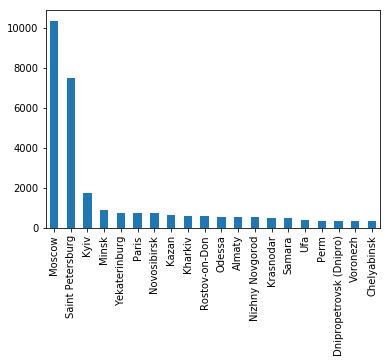

In [21]:
city_count.plot.bar() # строим график
plt.show() # показываем график

Можно сделать чуть красивее:

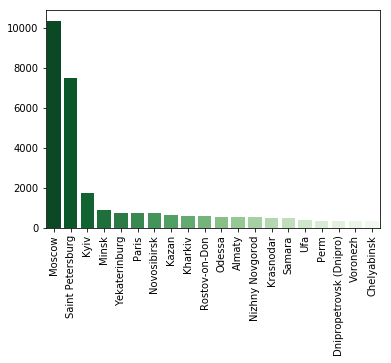

In [34]:
sns.barplot(city_count.index, city_count.values, palette='Greens_r') # рисуем график, выбираем цвет
plt.xticks(rotation=90) # разворачиваем подписи под городами на 90 градусов
plt.show() # показываем изображение

Не забываем про подписи к графику:

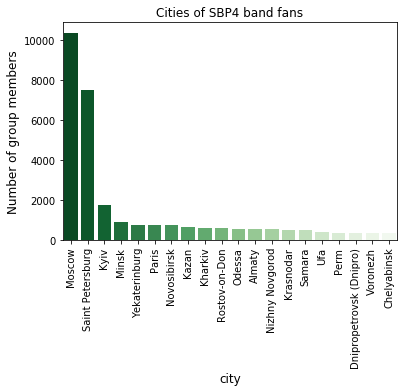

In [35]:
sns.barplot(city_count.index, city_count.values, palette='Greens_r') # рисуем график, выбираем цвет
plt.title('Cities of SBP4 band fans')
plt.ylabel('Number of group members', fontsize=12)
plt.xlabel('city', fontsize=12)
plt.xticks(rotation=90) # разворачиваем подписи под городами на 90 градусов
plt.show() # показываем изображение

То же самое можно делать и для других колонок.

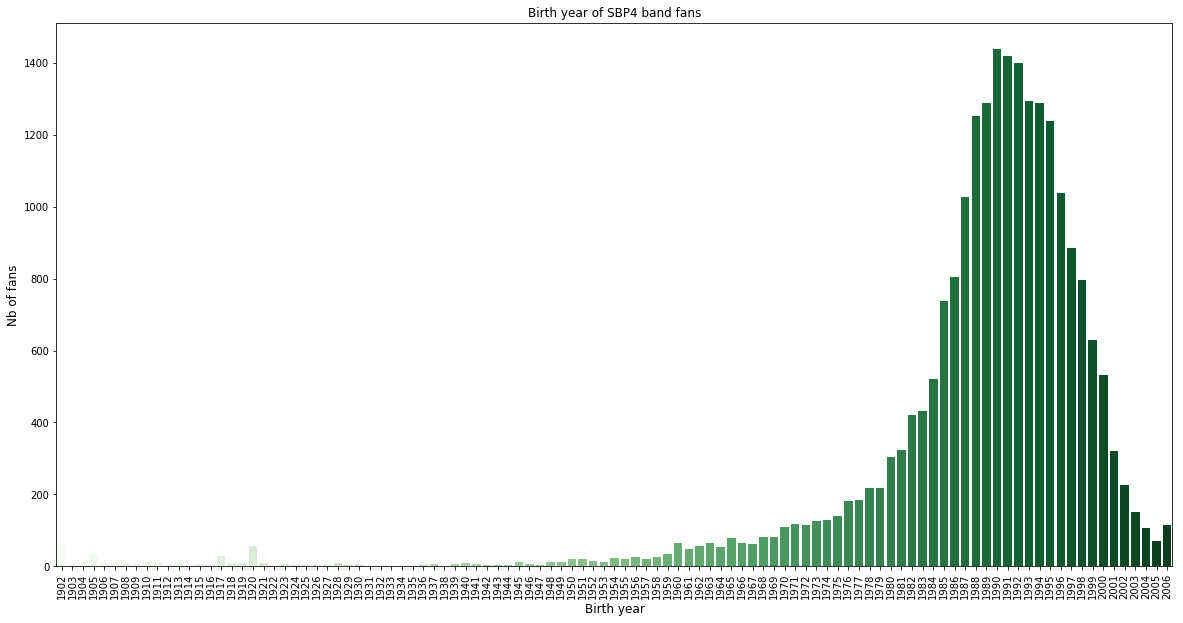

In [36]:
birth_count  = df['birth'].value_counts().drop('-') # выбираем столбец с датами рождения, подсчитываем их частоту, удаляем то, где нет даты рождения
plt.figure(figsize=(20,10)) # размер каритинки
sns.barplot(birth_count.index, birth_count.values, palette='Greens') # рисуем график, выбираем цвет
plt.title('Birth year of SBP4 band fans')
plt.ylabel('Nb of fans', fontsize=12)
plt.xlabel('Birth year', fontsize=12)
plt.xticks(rotation=90) # разворачиваем подписи под городами на 90 градусов
plt.show() # показываем изображение

### попробуйте построить такой график распределений по странам:

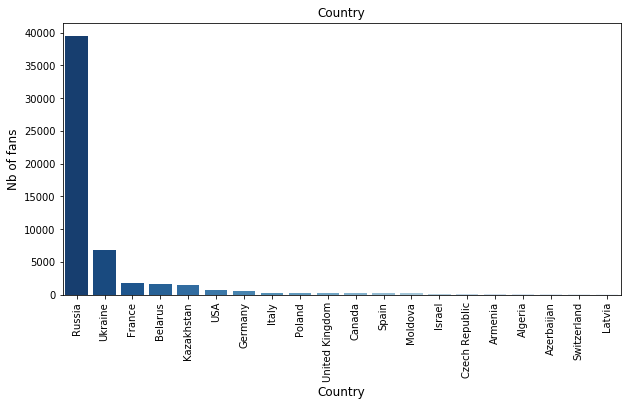

In [47]:
country_count  = df['country'].value_counts().drop('-')
country_count = country_count[0:20]
plt.figure(figsize=(10,5)) #размер картинки
ax = sns.barplot(country_count.index,country_count.values, palette='Blues_r') # рисуем график, выбираем цвет
plt.title('Country')
plt.ylabel('Nb of fans', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation=90) # разворачиваем подписи под городами на 90 градусов
plt.show() # показываем изображение# your code here

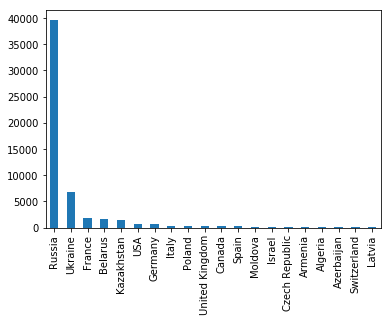

In [43]:
country_count  = df['country'].value_counts().drop('-') # считаем города и удаляем отсутствие города в табличке: "-"
country_count = country_count[:20]

country_count.plot.bar() # строим график
plt.show()

### 2. Boxplot

Помните ли вы что это?

![](https://statanaliz.info/wp-content/uploads/2015/10/Yaschik_s_usami_05.png)

А так?


![](https://2.bp.blogspot.com/-_9csDThpMec/Wo502OROS2I/AAAAAAAAG5g/YSgRIE442I0OKK9gVsB7S22aickL3FGlACLcBGAs/s1600/kak-chitat-diagrammu-boxplot-yashchik-s-usami-na-konkretnom-primere5.png)

Что мы можем построить, исходя из наших данных? Например, сравнить возраст мужчин и женщин, слушающих эту группу

In [48]:
new_df = df[df['sex'].ne('-')] # оставлем тех, кто указал свой пол
new_df['birth'] = pd.to_numeric(new_df['birth'], errors='coerce') # оставлем тех, кто указал свой возраст

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


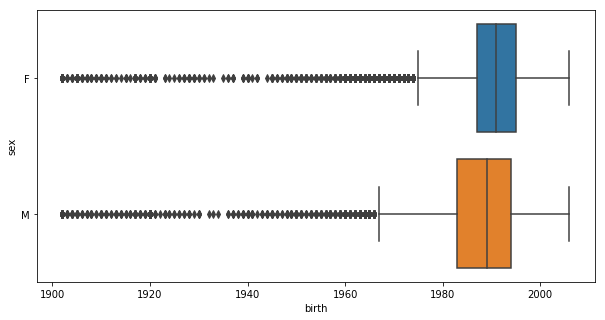

In [49]:
plt.figure(figsize=(10,5)) # размер графика
sns.boxplot(x="birth", y="sex", data=new_df) # строим график
plt.show()

Теперь давайте поговорим о ваших проектах (и втором домашнем задании, если это необходимо)

**Проект "Территории развития рэп-культуры (культуры хип-хопа) в Российской Федерации"**

*Задачи проекта:*
* Выявить центры развития хип-хопа в РФ;
* Определить в каждом регионе наиболее авторитетные паблики (лидеров движения);
* Сбор, структурирование и визуализация социальных (пол, возраст и проч.) и статистических (количество подписчиков, частота публикаций) характеристик;
* предложить методику измерения известности (заметности, популярности) РК в регионе;
* определить существующие сетевые взаимодействия между представителями конкретных территорий;
* визуализировать полученную информацию (пузырьковая карта; карта взаимосвязей)

Вы можете придумать задачи проекта, которые согласуются с вашей темой. (Не менее 5 задач)
Для выполнения задач, используйте весь арсенал данных и все имеющиеся навыки

Критерии оценки


* Автоматический сбор данных (наличие кода для сбора данных и самих данных в открытом доступе) - 3 балла (фактически ваше дз 2)

* Предобработка данных - 2 балла (тоже дз 2, частично сегодня разобрали в NLP)

* Визуализация данных - 2 балла (разобрали сегодня)

* Наличие анализа и выводов - 2 балла

* Презентация проекта - 1 балл (про презентацию скажу отдельно на последнем занятии)